# Mars Lander (Solution)

`NOTE: This should only be attempted after completing the course!`

Let's say we want to land some spacecrafts on Mars, and we're in the process of searching for a landing site. Imagine we have some elevation data for different regions of the surface that look like the following:

In [1]:
data = [1, 2.1, 3, 4.1, 4, 5.2, 7.1, 7.5, 8, 6.1, 6.3, 5.6, 3.9, 2.2, 2.1, 1.5, 1, 0.1, 0.1, 
        0, 0.1, 1, 1.2, 1, 1.1, 1.2, 1, 0.9, 1, 0.9, 1.2, 1.4, 1.1, 1.1, 0.8, 0.5, 0.5, 0.7,
        0.6, 0.5, 1, 2, 2.1, 2.1, 2.2, 2.1, 1.5, 1.6, 1.4, 1.2, 1.4, 1.1, 1.1, 0.8, 0.8, 0.9, 
        1.1, 1.5, 1.7, 1.7, 1.6, 1.8, 2, 2.1, 2.5, 2.2, 2.2, 2.3, 2.6, 3, 8, 7.4, 8.1, 7.9, 8, 
        7.6, 8, 8.7, 9, 8.5, 9, 8.6, 7.8, 8, 8.1, 8, 8.2, 8.5, 8.6, 8.4, 8.6, 7.8, 8, 8.1, 8]

Plot the data to get an idea of how it looks.

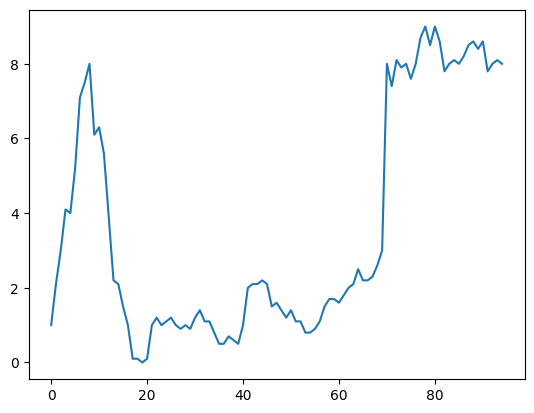

In [2]:
%matplotlib inline
import matplotlib.pyplot as pl

pl.plot(data)
pl.show()

So we can see a hill or mountain at the left of the dataset, and a cliff of some sort at the right.

There are two requirements for a landing site:

1. It is twice the size of the ship
2. It is relatively flat

"Twice the size of the ship" means that the region is at least twice the width or length of the ship, whichever is greater. 

"Relatively flat" depends on the undercarriage clearance of the ship. If the clearance is 1 unit, this means that the elevation of the region doesn't change by more than 1 unit from one coordinate to the next over the entire span of the region, and that the maximum and minimum elevations over the span of the region have a difference of less than 2 units (twice the clearance).

You will need to write a `getLandingSiteCoordinates` function that will take in a list of elevation data and an instance of a `Ship` class (which you will create) containing the ship's relevant attributes (length, width, and undercarriage clearance, all numbers and initialized positionally in that order). The function should return a list of coordinates corresponding to the centers the regions that meet the landing site requirements. _(If a region spans indices 5-8, the center coordinate would be 6.5.)_

Make sure to focus on modularizing your code as much as is necessary to simplify tasks.

In [3]:
class Ship:
    def __init__(self, length, width, undercarriageClearance):
        self.length = length
        self.width = width
        self.clearance = undercarriageClearance

In [4]:
def getLandingSiteCoordinates(data, ship):
    """Gets central coordinates that meet the requirements for a landing site.
    
    If the ship site size is 4 with clearance 1, and the data is [0, 5, 1, 1, 1, 1, 1, 5, 8]
    then regions with indices 2-5 and 3-6 are valid sites, with coordinates are 3.5 and 4.5.
    """
    coordinates = []
    siteSize = 2 * ship.length if ship.length > ship.width else 2 * ship.width
    leftIndex = 0
    for rightIndex in range(1, len(data)):  # Skipping rightIndex = 0
        if requirementsNotMet(data[leftIndex:rightIndex + 1], ship.clearance):
            leftIndex = rightIndex
        
        elif rightIndex - leftIndex == siteSize - 1:
            addCentralCoordinate(leftIndex, coordinates, siteSize)
            leftIndex += 1
    
    return coordinates


def requirementsNotMet(dataSlice, clearance):
    """Checks whether landing site elevation requirements are met in the horizontal direction."""
    if max(dataSlice) - min(dataSlice) > 2 * clearance:
        return True
    return abs(dataSlice[-1] - dataSlice[-2]) > clearance


def addCentralCoordinate(leftIndex, coordinates, siteSize):
    """Adds a central coordinate to the coordinates list."""
    centeringFactor = (siteSize - 1) / 2
    coordinates.append(leftIndex + centeringFactor)

If your code is working properly, the cell below will run without any errors:

In [5]:
data = [1, 2.1, 3, 4.1, 4, 5.2, 7.1, 7.5, 8, 6.1, 6.3, 5.6, 3.9, 2.2, 2.1, 1.5, 1, 0, 0, 
        0, 0.1, 1, 1.2, 1, 1.1, 1.2, 1, 0.9, 1, 0.9, 1.2, 1.4, 1.1, 1.1, 0.8, 0.5, 0.5, 0.7,
        0.6, 0.5, 1, 2, 2.1, 2.1, 2.2, 2.1, 1.5, 1.6, 1.4, 1.2, 1.4, 1.1, 1.1, 0.8, 0.8, 0.9, 
        1.1, 1.5, 1.7, 1.7, 1.6, 1.8, 2, 2.1, 2.5, 2.2, 2.2, 2.3, 2.6, 3, 8, 7.4, 8.1, 7.9, 8, 
        7.6, 8, 8.7, 9, 8.5, 9, 8.6, 7.8, 8, 8.1, 8, 8.2, 8.5, 8.6, 8.4, 8.6, 7.8, 8, 8.1, 8]

assert 18.5 in getLandingSiteCoordinates(data, Ship(1.1, 2, 0.15))
assert 27.5 in getLandingSiteCoordinates(data, Ship(1, 2, 0.15))
assert 42.5 in getLandingSiteCoordinates(data, Ship(1, 2, 0.15))
assert 43.5 in getLandingSiteCoordinates(data, Ship(1, 2, 0.15))
assert len(getLandingSiteCoordinates(data, Ship(1, 2, 0.15))) == 4

data2 = [1, 2, 3, 4, 3, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 
        0, 0, 3, 8, 7, 8, 7, 8, 8, 8, 9, 9, 8, 9, 7, 7, 7, 5, 4]

assert getLandingSiteCoordinates(data2, Ship(3, 2, 0)) == [13.5]
assert 12.5 in getLandingSiteCoordinates(data2, Ship(1, 2, 0))
assert 13.5 in getLandingSiteCoordinates(data2, Ship(1, 2, 0))
assert 14.5 in getLandingSiteCoordinates(data2, Ship(1, 2, 0))
assert 18.5 in getLandingSiteCoordinates(data2, Ship(1, 2, 0))
assert len(getLandingSiteCoordinates(data2, Ship(1, 2, 0))) == 4

data3 = [0, 5, 1, 1, 1, 1, 1, 5, 8]

assert 3.5 in getLandingSiteCoordinates(data3, Ship(1, 2, 1))
assert 4.5 in getLandingSiteCoordinates(data3, Ship(1, 2, 1))
assert len(getLandingSiteCoordinates(data3, Ship(1, 2, 1))) == 2

By the way, to visualize this a little better, I am providing some plotting functions and plots below. This shows some of the landing areas in red for different ship sizes and clearances.

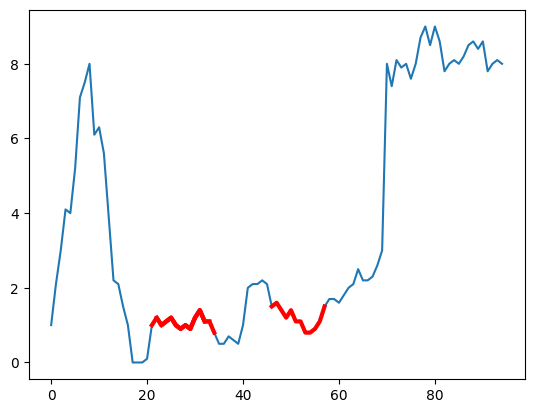

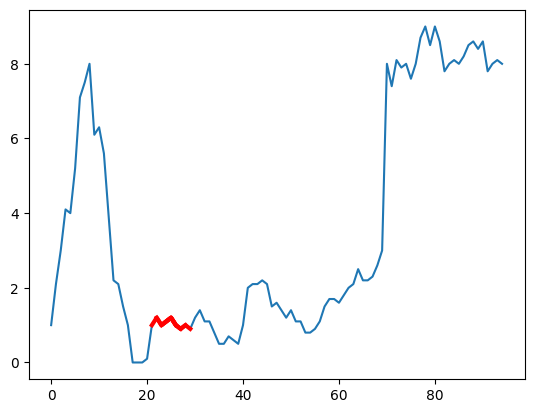

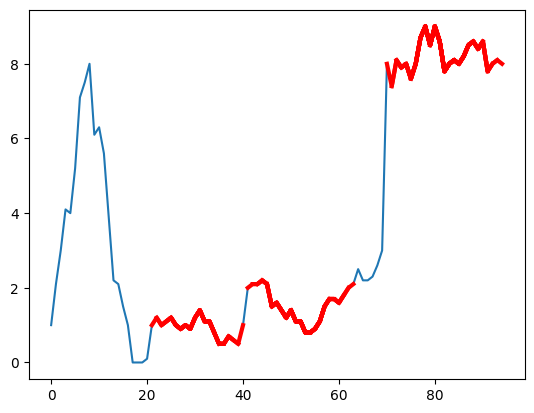

In [6]:
def plotLandingAreas(data, ship):
    coordinates = getLandingSiteCoordinates(data, ship)

    pl.plot(data)
    
    siteSize = 2 * ship.length if ship.length > ship.width else 2 * ship.width
    centeringFactor = (siteSize - 1) / 2
    for coordinate in coordinates:
        plotLandingArea(data, coordinate, centeringFactor)
    
    pl.show()


def plotLandingArea(data, coordinate, centeringFactor):
    left = int(coordinate - centeringFactor)
    right = int(coordinate + centeringFactor)
    coordinatesToPlot = [index for index in range(left, right + 1)]
    plotEdges = (coordinatesToPlot[0], coordinatesToPlot[-1])
    pl.plot(coordinatesToPlot, data[plotEdges[0]:plotEdges[1] + 1], color="red", linewidth = 3)

plotLandingAreas(data, Ship(6, 2, 0.4))
plotLandingAreas(data, Ship(3, 2, 0.2))
plotLandingAreas(data, Ship(4, 7, 0.8))